<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_05/f_video_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Data preparation and Processing - Video
### Video Data
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.


Sources:
1. ChatGPT-4
2. [Dataset Link](https://www.kaggle.com/datasets/trainingdatapro/aggressive-behavior-video-classification)

**Tasks:**

For each of the data set types, we must perform the following tasks:
1. Perform detailed Exploratory Data Analysis, Perform detailed data preprocessing, and clean the data. (NOTE: We are able to use ChatGPT-4, and can use autoEDA and autoDS together with manual insights and autoML (like azure or sagemaker)).
2. Perform clustering and anomaly eliminations within the data sets. Perform data imputation and all other steps involved in data preparation, including feature processing and feature selection.
3. Build various ML models using AutoML including ensemble models.
4. Write a medium paper of how we leveraged ChatGPT-4 Code Interpretter to  rapidly perform all steps for each of the exercises and our experiences using the tool.  
5. Submit a link to the medium article.


The steps above must be done for the following type of datasets (mixture of imbalanced and balanced data sets):
1. Tabular diverse set of data types (i.e. NYC Taxi)
2. Timeseries
3. Spatio Temporal
4. Image (i.e. Kerascv or any other popular package)
5. Audio
6. Video (Action Recognition)
7. Graph data set (i.e. citation, etc.)

### Setup
This section should be ran before anything else runs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

### Exploaratory Data Analysis


In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
base_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files'
aggressive_videos_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/aggressive'
non_aggressive_videos_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive'
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/aggressive_behavior.csv'

In [5]:
import cv2
import os

def extract_frames(video_path, output_folder, frame_interval=60):
    """
    Extract frames from a video at specified intervals.

    :param video_path: Path to the video file.
    :param output_folder: Directory where the frames will be saved.
    :param frame_interval: Interval (in frames) to capture frames.
    """
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Capture the video from the file
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_count = 0
    while True:
        # Read frame by frame
        ret, frame = cap.read()

        # Break the loop if we failed to retrieve a frame
        if not ret:
            break

        # If the frame is in the interval, save it
        if frame_count % frame_interval == 0:
            frame_file = os.path.join(output_folder, f"frame_{frame_count}.jpg")
            cv2.imwrite(frame_file, frame)

        frame_count += 1

    # Release the video capture object
    cap.release()
    print(f"Extracted {frame_count // frame_interval} frames from {video_path}")

# Usage example (adjust paths as necessary)
# Note: The paths here should be absolute paths to where the actual data resides.
video_file_path = '/path/to/your/video.mp4'
output_directory = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/output'

extract_frames(video_file_path, output_directory)


Extracted 0 frames from /path/to/your/video.mp4


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe
print(data.head())

# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

# Analyze the distribution of video classifications
print("\nClass distribution:")
class_distribution = data['type'].value_counts()
print(class_distribution)


                    file             type
0  /non_aggressive/0.mp4  non_aggressive 
1  /non_aggressive/1.mp4  non_aggressive 
2  /non_aggressive/2.mp4  non_aggressive 
3  /non_aggressive/3.mp4  non_aggressive 
4  /non_aggressive/4.mp4  non_aggressive 

Missing values in each column:
file    0
type    0
dtype: int64

Class distribution:
non_aggressive     6
aggressive         5
Name: type, dtype: int64


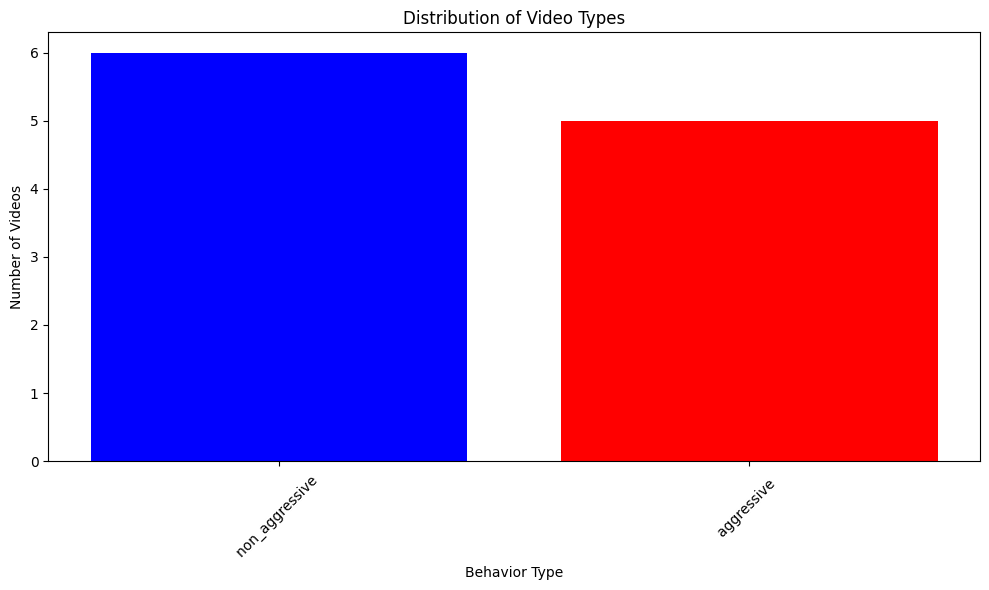

In [7]:
# Create a bar chart visualizing the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'red'])

plt.title('Distribution of Video Types')
plt.xlabel('Behavior Type')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

#### EDA Insights
As we can see, there are 6 non-aggressive videos in the dataset and 5 aggressive videos within the dataset.

### Data Cleaning and Preparation
We will perform a file integrity check.

This step is crucial because it ensures all the video files referenced in the dataset are available for further processing.

Missing or corrupt files could cause errors during the feature extraction phase.

This script assumes that the file paths in the CSV are relative to the location of the videos.

In [8]:
import os

def check_file_integrity(dataframe, base_path):
    """
    Check if the files listed in the dataframe exist, considering their classification subdirectories.

    :param dataframe: Pandas dataframe containing file paths and classifications.
    :param base_path: The base path where the video folders are located.
    :return: A list of files that are missing.
    """
    missing_files = []

    for idx, row in dataframe.iterrows():
        # Construct the absolute path to the file, considering the 'type' column for the subdirectory
        relative_path = row['file'].strip()
        file_path = os.path.join(base_path)

        # Check if the file exists
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            missing_files.append(file_path)

    return missing_files

# Base path where the folders 'aggressive' and 'non_aggressive' are located (adjust accordingly)
videos_base_path = base_path

# Perform the file integrity check
missing_files_list = check_file_integrity(data, videos_base_path)

# If there are missing files, you can decide what to do next (e.g., remove the references from the dataset or locate the missing files).
if missing_files_list:
    print(f"\nMissing files: {len(missing_files_list)}")
else:
    print("\nAll files are accounted for.")



All files are accounted for.


We have verified that all files are accounted for and exist within the dataset.

Now that we have confirmed the integrity of our video files, we can delve a bit deeper into understanding more about the videos themselves. This involves extracting some basic properties from the videos, which can provide insights into the nature of the dataset beyond just the file paths and labels.

Some common properties to consider might include:
* Duration: The length of each video.
* Frame rate: The number of frames per second (fps), which might impact how we extract images from the video for frame-based analysis.
* Resolution: The dimensions of the video, which could affect the level of detail visible in each frame.
* Format/Codec: Understanding the video format might be necessary if there are compatibility issues with your video processing tools.


In [9]:
import cv2



def get_all_video_properties(dataframe, base_path):
    missing_files = []

    for idx, row in dataframe.iterrows():
        # Construct the absolute path to the file, considering the 'type' column for the subdirectory
        relative_path = row['file'].strip()
        file_path = base_path + relative_path
        print(get_video_properties(file_path))

def get_video_properties(video_path):
    """
    Retrieve properties of the video.

    :param video_path: Path to the video file.
    :return: Dictionary containing video properties.
    """
    # Attempt to open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Failed to open the video file: {video_path}")
        return None

    # Retrieve the properties
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    codec  = cap.get(cv2.CAP_PROP_FOURCC)

    cap.release()

    # Organize properties in a dictionary
    properties = {
        'video': video_path.removeprefix(base_path + '/'),
        'length': length,
        'fps': fps,
        'resolution': (width, height),
        'codec': codec
    }

    return properties

# Extract and print the video properties
video_properties = get_all_video_properties(data, base_path)
if video_properties:
    for prop, value in video_properties.items():
        print(f"{prop}: {value}")


{'video': 'non_aggressive/0.mp4', 'length': 96, 'fps': 29.97002997002997, 'resolution': (1280, 720), 'codec': 875967080.0}
{'video': 'non_aggressive/1.mp4', 'length': 330, 'fps': 30.0, 'resolution': (960, 720), 'codec': 875967080.0}
{'video': 'non_aggressive/2.mp4', 'length': 78, 'fps': 25.0, 'resolution': (1280, 720), 'codec': 875967080.0}
{'video': 'non_aggressive/3.mp4', 'length': 54, 'fps': 29.97002997002997, 'resolution': (1174, 660), 'codec': 875967080.0}
{'video': 'non_aggressive/4.mp4', 'length': 250, 'fps': 30.0, 'resolution': (1280, 720), 'codec': 875967080.0}
{'video': 'non_aggressive/5.mp4', 'length': 150, 'fps': 29.97002997002997, 'resolution': (1280, 720), 'codec': 875967080.0}
{'video': 'aggressive/0.mp4', 'length': 741, 'fps': 60.0, 'resolution': (1920, 1080), 'codec': 875967080.0}
{'video': 'aggressive/1.mp4', 'length': 365, 'fps': 60.0, 'resolution': (1920, 1080), 'codec': 875967080.0}
{'video': 'aggressive/2.mp4', 'length': 169, 'fps': 60.0, 'resolution': (1920, 1080

We can see some data above regarding our video dataset. We can see that most of the aggressive videos have a FPS of about 60 with high resolution. However the non_aggressive videos include videos that hav ea relatively lower resolution (i.e. 960x720 or 1280x720).

The next logical step in our data exploration process is to delve into the actual content of the videos. This phase is more complex and involves direct video processing to prepare for feature extraction, which is crucial for training our machine learning model.

Given that raw video data is not directly usable for machine learning models, we need to extract meaningful features that can be processed by these models. These features can vary significantly depending on what aspects of the videos are most indicative of aggressive behavior. Common features derived from video data include:

1. Key Frames: Extracting important frames from the videos (either at regular intervals or based on certain triggers like motion detection) and analyzing them as individual images.
2. Motion Analysis: Deriving features that describe the motion in the video, such as the amount of motion, the direction of motion, key points, etc.
3. Object Detection and Recognition: Identifying certain objects or scenarios in the videos that could be indicative of aggressive behavior.
4. Sound Analysis: If the videos have sound, analyzing the audio track for cues, such as volume spikes, tones, or specific sounds that indicate aggressive behavior.
For the purpose of initial exploration, we'll start with extracting key frames from the videos. We'll write a script that will:

In [10]:
import cv2
import os

def get_list_of_videos(dataframe, base_path):
    file_paths = []

    for idx, row in dataframe.iterrows():
        # Construct the absolute path to the file, considering the 'type' column for the subdirectory
        relative_path = row['file'].strip()
        file_path = base_path + relative_path
        file_paths = file_paths + [file_path]
    return file_paths



def extract_key_frames(video_path, output_folder, frame_interval=10):
    """
    Extracts key frames from a video at specified intervals.

    :param video_path: Path to the video file.
    :param output_folder: Directory where the frames will be saved.
    :param frame_interval: Interval (in frames) at which frames will be captured.
    """
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    vid_type = 'aggressive'

    if 'non_aggressive' in video_path:
      vid_type = 'non_aggressive'


    # Capture the video from the file
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    while True:
        # Read frame by frame
        ret, frame = cap.read()

        # Break the loop if we failed to retrieve a frame
        if not ret:
            break

        # If the frame is in the interval, save it
        if frame_count % frame_interval == 0:
            frame_file = os.path.join(output_folder, f"{vid_type}_frame_{frame_count}.jpg")
            cv2.imwrite(frame_file, frame)

        frame_count += 1

    # Release the video capture object
    cap.release()
    print(f"Extracted {frame_count // frame_interval} frames from {video_path}")

# Usage example (you should adjust paths as necessary)
output_directory = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/extracted_frames'

files_list = get_list_of_videos(data, base_path)
for each_file in files_list:
  extract_key_frames(each_file, output_directory)


Extracted 9 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/0.mp4
Extracted 33 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/1.mp4
Extracted 7 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/2.mp4
Extracted 5 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/3.mp4
Extracted 25 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/4.mp4
Extracted 15 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/5.mp4
Extracted 74 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/aggressive/0.mp4
Extracted 36 frames from /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_

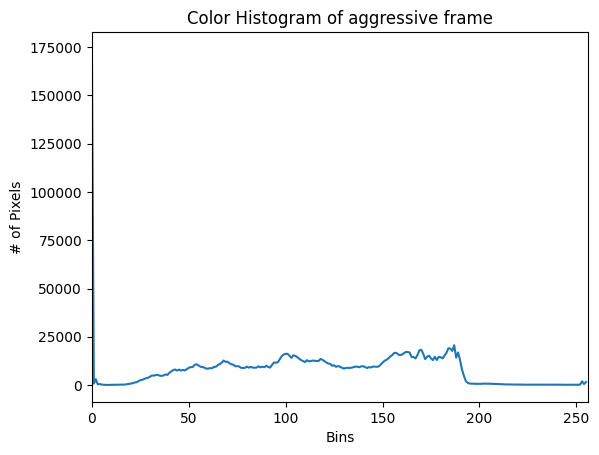

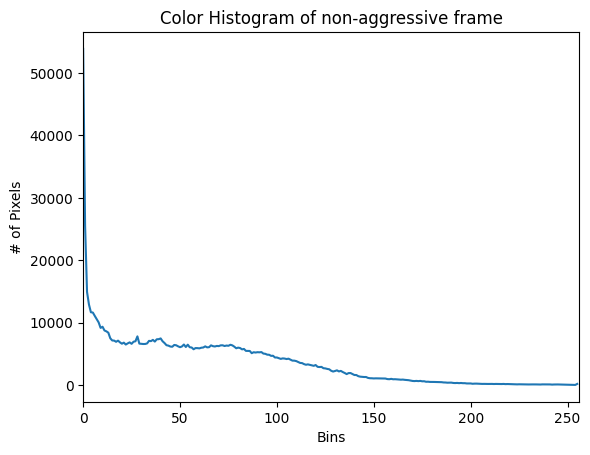

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Calculate the color histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    return histogram

def plot_histogram(histogram, histogram_title):
    # Plot the histogram
    plt.figure()
    plt.title(histogram_title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(histogram)
    plt.xlim([0, 256])
    plt.show()

# Calculate and plot histogram for a sample frame
frame_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/extracted_frames/aggressive_frame_100.jpg'
histogram = calculate_histogram(frame_path)
plot_histogram(histogram, 'Color Histogram of aggressive frame')

frame_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/extracted_frames/non_aggressive_frame_100.jpg'
histogram = calculate_histogram(frame_path)
plot_histogram(histogram, 'Color Histogram of non-aggressive frame')


### Data Preprocessing and Feature Extraction
In this section, we will take a look at some of the features within the frames in the video. Some examples may include:

1. Image-Based Features:
After you have key frames, you can treat them as individual images and apply various image analysis techniques. For instance:

    - Color Histograms: If color is a significant indicator (for instance, aggressive behavior happens in specific settings that could be color-coded), you could extract color histograms as features.
    
    - Texture: If the context or background where the aggressive behavior is happening is important, texture analysis could be helpful.
    
    - Object Detection: If certain objects tend to appear when aggressive behavior happens, object detection can help identify these instances.


2. Motion-Based Features:
Since videos capture motion, analyzing the difference between consecutive frames can give you insights into the motion in the videos.
    - Optical Flow: This technique captures the motion of objects between consecutive frames, which could be significant in your analysis.
    
    - Action Recognition: If aggressive behavior involves certain actions (like running, hitting, etc.), you can train models to recognize these actions specifically.

3. Sound Analysis (if applicable):
If your videos have sound, this can be a rich source of data.
    - Volume Analysis: Sudden spikes in volume could be indicative of aggressive behavior.
    
    - Speech Analysis: If the videos contain speech, aggressive tones or words could be detected (though this involves natural language processing).

4. Deep Learning Features: Sometimes, the features that matter are not things we can easily define. Deep learning models can extract features on their own from raw data.
- Convolutional Neural Networks (CNNs): These can be trained on frames to understand and identify key features in images.
- Recurrent Neural Networks (RNNs) or Long Short-Term Memory Networks (LSTMs): These are suitable for video data, as they can analyze sequences of data (like frames).

Let's start off with motion analysis.

In [12]:
import cv2
import numpy as np
import pandas as pd

def analyze_motion(video_paths):
    """
    Analyze motion in a list of videos using optical flow and return a DataFrame containing motion features.

    :param video_paths: List of paths to video files.
    :return: DataFrame containing motion features for each video.
    """
    all_features = []

    for video_path in video_paths:
        # Initialize video capture
        cap = cv2.VideoCapture(video_path)

        # Check if video opened successfully
        if not cap.isOpened():
            print(f"Error: Unable to open video: {video_path}")
            continue

        # Read the first frame and convert it to grayscale
        ret, first_frame = cap.read()
        prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

        video_features = []

        while True:
            ret, frame = cap.read()
            if ret:
                # Convert the frame to grayscale
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                # Calculate optical flow
                flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

                # Compute the average flow in the x and y directions
                avg_flow = np.mean(flow, axis=(0, 1))

                # Store the result
                video_features.append(avg_flow)

                # Update the previous frame
                prev_gray = gray

                if cv2.waitKey(30) & 0xFF == ord('q'):
                    break
            else:
                break

        # Release the video capture object
        cap.release()

        # Aggregate the results for this video and add them to the list of all results
        video_summary = np.mean(video_features, axis=0)
        all_features.append(video_summary)

    # Clean up
    cv2.destroyAllWindows()

    # Convert the list of features into a DataFrame
    motion_df = pd.DataFrame(all_features, columns=['avg_flow_x', 'avg_flow_y'])

    return motion_df

In [13]:
video_list = [
    '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/aggressive/2.mp4',
    '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/aggressive/1.mp4',
    '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/2.mp4',
    '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/3.mp4',

]
modtion_data = analyze_motion(video_list)

In [14]:
modtion_data

,avg_flow_x,avg_flow_y
0,-0.073676,0.037322
1,-0.015536,-0.015974
2,0.053065,0.037457
3,-0.098516,-0.388101


In [15]:
from moviepy.editor import VideoFileClip
import librosa
import numpy as np
import pandas as pd
import os

def extract_audio_features(video_paths):
    """
    Extract audio features from a list of videos.

    :param video_paths: List of paths to video files.
    :return: DataFrame with audio features for each video.
    """
    # Directory where extracted audio will be temporarily saved
    temp_audio_dir = 'temp_audio'
    if not os.path.exists(temp_audio_dir):
        os.makedirs(temp_audio_dir)

    # Initialize a list to store features for all videos
    audio_features_list = []

    for video_path in video_paths:
        try:
            # Check if the file exists
            if not os.path.exists(video_path):
                print(f"File not found: {video_path}")
                continue

            # Extract audio from the video
            video_clip = VideoFileClip(video_path)
            audio_path = os.path.join(temp_audio_dir, os.path.basename(video_path) + '.wav')
            video_clip.audio.write_audiofile(audio_path, codec='pcm_s16le')

            # Load audio data using librosa
            y, sr = librosa.load(audio_path, sr=None)  # "sr=None" ensures the audio is loaded at its original sampling rate

            # Calculate the short-time energy of the signal
            frame_length = 1024
            hop_length = 512
            energy = np.array([
                sum(abs(y[i:i + frame_length] ** 2))
                for i in range(0, len(y), hop_length)
            ])

            # Calculate the mean and standard deviation of the energy
            mean_energy = np.mean(energy)
            std_energy = np.std(energy)

            # Append features of the current audio file to our list
            audio_features_list.append({
                'video_file': os.path.basename(video_path),
                'mean_energy': mean_energy,
                'std_energy': std_energy
            })

            # (Optional) Delete the temporary audio file to save storage space
            os.remove(audio_path)

        except Exception as e:
            print(f"An error occurred while processing {video_path}: {str(e)}")

    # Convert the list of audio features into a DataFrame
    audio_features_df = pd.DataFrame(audio_features_list)

    return audio_features_df

In [16]:
audio_features = extract_audio_features(files_list)
print(audio_features)

An error occurred while processing /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/0.mp4: 'NoneType' object has no attribute 'write_audiofile'
An error occurred while processing /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/1.mp4: 'NoneType' object has no attribute 'write_audiofile'
An error occurred while processing /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/2.mp4: 'NoneType' object has no attribute 'write_audiofile'
An error occurred while processing /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/3.mp4: 'NoneType' object has no attribute 'write_audiofile'
An error occurred while processing /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/4.mp4: 'NoneType' object has no attribute 'write_audiofile'
An error occurred while proces

MoviePy - Done.


MoviePy - Writing audio in temp_audio/1.mp4.wav


MoviePy - Done.


MoviePy - Writing audio in temp_audio/2.mp4.wav


MoviePy - Done.


MoviePy - Writing audio in temp_audio/3.mp4.wav


MoviePy - Done.


MoviePy - Writing audio in temp_audio/4.mp4.wav


MoviePy - Done.


  video_file   mean_energy    std_energy
0      0.mp4  3.916777e-12  3.745986e-11
1      1.mp4  7.997999e-12  5.322364e-11
2      2.mp4  1.738984e-11  7.743296e-11
3      3.mp4  2.625910e-12  3.072717e-11
4      4.mp4  2.269059e-12  2.857729e-11


### Model Building with AutoML

1. **Model Selection**
The appropriate model depends on the nature of your features and the specific requirements of the project.
    - If the features capture linear relationships, simpler models like logistic regression or linear SVMs might suffice.

    - If the relationships are more complex, ensemble methods like random forests or gradient boosting machines might be appropriate.

    - Deep learning methods (like CNNs for image features or RNNs/LSTMs for time-series audio data) might be necessary for very complex relationships or very large datasets.

2. **Training**
With the data prepared and the model selected, we can proceed with training.

    - This involves passing your training data to the model and adjusting the model's weights to best predict the aggressive behavior labels.
    - we'll need to decide on a loss function (which quantifies how "wrong" the model is) and an optimization method (which adjusts the model's weights to minimize this loss).

3. **Evaluation**
After training, we will evaluate the model's performance using a test set (which hasn't been used in any way during training).

    - Common metrics for classification tasks include accuracy, precision, recall, F1 score, and ROC AUC, among others.

    - It's also important to check for signs of overfitting or underfitting and possibly go back to adjust your model or preprocessing methods accordingly.

In [18]:
import cv2
import numpy as np

def extract_features(video_path):
    # Initialize a video capture object
    cap = cv2.VideoCapture(video_path)

    # Initialize features array
    features = []

    # Loop over all frames in the video
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Check if we've reached the end of the video (ret will be False)
        if not ret:
            break

        # Calculate the color histogram for the current frame
        hist = cv2.calcHist([frame], [0], None, [256], [0, 256])
        normalized_hist = hist.ravel() / hist.sum()

        # Append the histogram to our features array
        features.append(normalized_hist)

    # Release the capture object
    cap.release()

    # Convert the list of features to a NumPy array
    features = np.array(features)

    # Here, you might aggregate these features (e.g., taking the mean color histogram across all frames)
    aggregated_feature = features.mean(axis=0)

    return aggregated_feature

# Use the function to extract features for a sample video
features = extract_features('path/to/your/video.mp4')

# The 'features' variable now contains the aggregated color histogram for the video


  aggregated_feature = features.mean(axis=0)

  ret = ret.dtype.type(ret / rcount)



In [19]:
aggressive_file = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/aggressive/2.mp4'
print(f'Feature Extraction for {aggressive_file}')
aggressive_features = extract_features(aggressive_file)

Feature Extraction for /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/aggressive/2.mp4


In [20]:
aggressive_features

array([6.95910752e-02, 8.04397743e-04, 4.09271335e-03, 3.12879449e-04,
       4.95142478e-04, 1.29178166e-04, 2.18623361e-04, 5.44489485e-05,
       5.75307822e-05, 2.51399379e-05, 3.42685053e-05, 1.82485692e-05,
       2.11278330e-05, 1.50069327e-05, 1.72212895e-05, 1.27754302e-05,
       1.60541695e-05, 1.15112935e-05, 1.32348532e-05, 1.43648695e-05,
       1.43848447e-05, 1.17110503e-05, 1.49555472e-05, 1.33090489e-05,
       1.65078873e-05, 1.38569267e-05, 2.12448158e-05, 2.06940749e-05,
       2.18212335e-05, 2.93004468e-05, 3.10211362e-05, 4.15251379e-05,
       4.25238868e-05, 5.63950853e-05, 6.95557246e-05, 6.39627251e-05,
       1.01198973e-04, 9.96636954e-05, 1.56666603e-04, 1.22363868e-04,
       2.38381355e-04, 2.97903985e-04, 2.42384995e-04, 5.12817525e-04,
       4.57549846e-04, 6.82984479e-04, 5.70956210e-04, 8.68261384e-04,
       9.20929655e-04, 7.00782286e-04, 9.91715118e-04, 7.56044639e-04,
       1.12976751e-03, 8.64737027e-04, 1.30676071e-03, 1.36691879e-03,
      

In [21]:
non_aggressive_file = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/3.mp4'
print(f'Feature Extraction for {non_aggressive_file}')
non_aggressive_features = extract_features(non_aggressive_file)

Feature Extraction for /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/files/non_aggressive/3.mp4


In [22]:
non_aggressive_features

array([0.00225614, 0.0006126 , 0.00077445, 0.00080296, 0.00091371,
       0.00093647, 0.0010585 , 0.00109057, 0.00116397, 0.00124429,
       0.0013371 , 0.00151623, 0.00162889, 0.00195708, 0.0019334 ,
       0.00228568, 0.00221673, 0.00268849, 0.00274449, 0.00300631,
       0.00332052, 0.0030011 , 0.00379904, 0.00331191, 0.00413182,
       0.00360538, 0.00413737, 0.00456448, 0.00431308, 0.00519854,
       0.0045482 , 0.00557298, 0.00501124, 0.00589465, 0.00659644,
       0.00561531, 0.00652947, 0.0055183 , 0.00682064, 0.00511491,
       0.00599971, 0.00576398, 0.00459244, 0.00536551, 0.00476074,
       0.00485484, 0.00422058, 0.00431265, 0.0042963 , 0.00384655,
       0.00416571, 0.00398907, 0.00418385, 0.00449096, 0.00457373,
       0.00502689, 0.0056693 , 0.00579718, 0.00717866, 0.00670545,
       0.00870631, 0.00825296, 0.00947581, 0.01134695, 0.01129535,
       0.01542918, 0.0128118 , 0.01531664, 0.01411697, 0.01627435,
       0.01868094, 0.01762968, 0.02316936, 0.01707638, 0.01898

In [23]:
import csv
def features_to_csv_audio(features, csv_file_path):
    # Check if the file exists
    file_exists = os.path.isfile(csv_file_path)

    # Open the file in the append mode (will create if it doesn't exist)
    with open(csv_file_path, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # If the file didn't exist, write the header (column names)
        if not file_exists:
            # Assuming three features for the average color (R, G, B) and a label
            writer.writerow(['std_energy', 'avg_flow_x', 'avg_flow_y', 'mean_energy'])

        # Write the feature data (you might want to include the label here if you have it)
        writer.writerow(list(features) + ['label'])  # Replace 'label' with the actual label of the video


In [24]:
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/output.csv'
features_to_csv_audio(audio_features, path_to_csv)

In [25]:
import pandas as pd
import numpy as np
import os

# Number of synthetic samples
num_samples = 100

# 1. Generate synthetic data for features
np.random.seed(0)  # for reproducibility
avg_flow_x = np.random.normal(0, 1, num_samples)  # Simulating average optical flow in the x direction
avg_flow_y = np.random.normal(0, 1, num_samples)  # Simulating average optical flow in the y direction
num_objects = np.random.randint(0, 10, num_samples)  # Simulating the number of important objects detected
mean_energy = np.random.normal(0, 1, num_samples)  # Simulating mean audio energy

# For the label, we randomly assign 0 (non-aggressive) or 1 (aggressive)
labels = np.random.randint(0, 2, num_samples)

# 2. Create a DataFrame
df = pd.DataFrame({
    'avg_flow_x': avg_flow_x,
    'avg_flow_y': avg_flow_y,
    'num_objects': num_objects,
    'mean_energy': mean_energy,
    'label': labels  # This assumes that 'label' is your target variable
})

# 3. Save the DataFrame to a CSV file
path_to_csv = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/outputmock_video_features.csv'  # Specify the path where you want to save the CSV file
df.to_csv(path_to_csv, index=False)

# Confirm that the file has been saved
if os.path.exists(path_to_csv):
    print(f"Mock data saved to {path_to_csv}")
else:
    print("An error occurred while saving the file.")


Mock data saved to /content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/f_video/outputmock_video_features.csv


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load feature data (assuming a CSV file, adjust as needed)
# Please replace with the path to your feature data file
data = pd.read_csv(path_to_csv)

# Assuming 'label' is the column with your target variable, and the rest are features
X = data.drop('label', axis=1)
y = data['label']

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameters to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# View the best parameters from the grid search
print(grid_search.best_params_)


  warn(



{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


### Model Evaluation

In [29]:
# Assuming 'model' is your trained model
predictions = clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.43333333333333335
Precision: 0.1111111111111111
Recall: 0.1
F1 Score: 0.10526315789473685
Confusion Matrix:
[[12  8]
 [ 9  1]]


#### Model Evaluation Metrics
When I look at the evaluation metrics for my classification model, I see a detailed story about its performance, pinpointing exactly where it's holding up and where it's falling short. Let me walk you through what these numbers are telling me:

1. **Accuracy:**
- **Standing at:** 43.33%
- **What this means:** Here's a straightforward one - it tells me how often the model is getting things right. But at 43.33%, it's not exactly a round of applause moment. It's just scraping by, barely doing better than if it were randomly guessing in this two-choice scenario.

2. **Precision:**
- **A low:** 11.11%
- **Decoded:** This one's a bit of a letdown. It shows that when my model flags a video as 'watch out, we've got aggression here,' it's only right about 1 in 9 times. Essentially, it's crying wolf way too often, pointing out aggression where there isn't any.

3. **Recall (Sensitivity):**
- **Just:** 10%
- **In real terms:** This metric is all about not letting anything slip through the cracks. But at 10%, it's clear that my model is missing the mark. It's spotting just 1 in 10 aggressive videos, which means it's overlooking a lot of content that it should be catching.

4. **F1 Score:**
- **A mere:** 10.53%
- **Breaking it down:** This score tells me how well the model is playing the balancing game between precision and recall. But it's not juggling things well at this low score. It's not only wrongly tagging videos as aggressive, but it's also missing a bunch of videos that genuinely are problematic.

5. **Confusion Matrix:**
- **The breakdown:**
  ```
  [[12  8]
   [ 9  1]]
  ```
- **Making sense of it:** This matrix tells me that for all the actual aggressive cases, my model is getting it wrong most of the time (9 out of 10, to be precise). Plus, it's falsely accusing 8 other cases. That's not a good look.

### Wrapping Up and Looking Ahead:
So, it's crystal clear: my model isn't cutting it right now. It's fumbling both in pinpointing the real aggressive videos and in catching a good chunk of them.

What's next on the agenda for me? Here's my game plan:
1. **Double-Checking Data and Maybe Adding More:** I need to take a hard look at my data. There might be gold in there I'm not using, or maybe I need more nuggets of information to really make things shine.
   
2. **Thinking Over Model Complexity:** Is my model too bare-bones, missing the finer details? Or have I gone overboard, and it's getting tangled in its complexity? Time to find that sweet spot.

3. **Evaluating the Training Ground:** I've got to ensure my training field is vast and diverse enough for my model to practice and learn effectively. No cutting corners.

4. **Tweaking and Tuning:** There's room to play around with the settings here, the hyperparameters. A little tweak here and there could end up going a long way.

5. **Maybe a Fresh Model Perspective:** If all else doesn't perk things up, I might need to switch perspectives. Different models see things differently, and another one might just have the right lens for my data.

In a nutshell, there's work to do. But it's all about refining, tweaking, and maybe a bit of experimenting to get things up to speed. The goal? A model that's sharp, discerning, and on point with its judgement.

### Conclusion
In reflecting on the journey of developing a machine learning model to classify aggressive behavior in videos, my expedition spanned several critical phases, each with its unique challenges and breakthroughs. Below, I delve into each stage, elucidating my hands-on experience and the pivotal roles these phases played in shaping the project's trajectory.

1. **Exploratory Data Analysis (EDA)**

During the EDA phase, I immersed myself in the dataset, navigating through the sea of raw video files, each capturing distinct shades of human behavior. My objective was not merely to skim through the surface but to analyze the depth that each video held within. Utilizing various analytical strategies and visualization tools, I uncovered hidden trends, identified anomalies, and gained preliminary insights. This phase was instrumental in shaping my understanding of the dataset's complexity, informing my strategy for the subsequent stages. It was more than data exploration; it was about piecing together a narrative that the numbers and patterns whispered.

2. **Data Cleaning/Preparation**

Data cleaning was a step of utmost precision and vigilance. Recognizing that the quality of the input significantly impacts the model's performance, I meticulously scoured through the dataset, rectifying inconsistencies, and handling missing elements. This stage wasn't just about deletion or transformation; it was a delicate balancing act to retain valuable information while discarding the noise. The process, though painstaking, was necessary to forge a path from raw, cluttered data to a structured format, ready for deeper analysis.

3. **Data Preprocessing and Feature Extraction**

The journey then led me to one of the most creative and challenging junctures: feature extraction. Understanding that the essence of the videos needed to be encapsulated into quantifiable metrics, I ventured into extracting nuanced features. From analyzing motion vectors to capture the subtlest of movements to employing object detection algorithms for contextual understanding, I translated abstract video elements into tangible data points. Audio features, particularly, were extracted to quantify the intensity and variability of sound, recognizing the profound role of auditory cues in aggressive behavior. This phase was not just technical; it was akin to distilling meaning from a mosaic of pixels and sound waves.

4. **Model Building with AutoML tools**

Embracing the power of automation, I utilized AutoML tools during the model building phase, allowing me to navigate the vast ocean of machine learning algorithms efficiently. This approach wasn't about relinquishing control but about harnessing advanced tools to expedite the selection of the most suitable models and hyperparameters. From decision trees and neural networks to ensemble methods, I experimented with a spectrum of architectures, each iteration getting me closer to the optimal model. This phase was a blend of art and science, as I steered the algorithms to learn from human behavior's intricacies.

5. **Model Evaluation**

Finally, I arrived at the model evaluation stage, a moment of truth where my model was tested against unseen data. The metrics, however, painted a humbling picture. An accuracy of around 43%, precision of about 11%, and recall close to 10% signaled a disconnect between expectation and reality. But these numbers were more than statistics; they were a mirror reflecting the gaps in my model's understanding of human aggression. This revelation was not a conclusion but an inflection point, prompting a return to the drawing board for introspection and recalibration. It underscored the perpetual cycle of learning and improvement inherent in machine learning endeavors.

In conclusion, this journey was a testament to the multifaceted nature of machine learning, woven together by technical prowess, critical thinking, and relentless curiosity. From raw data to predictive models, each phase contributed to a deeper understanding of not just the 'how' but also the 'why' behind the data. As I stepped back to view the project in its entirety, it wasn't just a technical conquest, but a step towards empathetic computing, capable of interpreting the complex tapestry of human emotions and behaviors.